In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
%matplotlib inline 

In [3]:
df=pd.read_csv("./penguins.csv")
print("Size of the dataframe = ", df.shape)
df.head()

Size of the dataframe =  (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# Count NA values in each column
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
df_=df.dropna(how="all") #删掉行全为NaN的行
print("Size of the dataframe = ", df_.shape)
df_.head()

Size of the dataframe =  (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df_=df_.fillna(method='ffill') #用前一个非缺失值去填充该缺失值
print("Size of the dataframe = ", df_.shape)
df_.head()

Size of the dataframe =  (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
# Count NA values in each column
df_.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
# Get how many values can the features take
df_.nunique() 

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

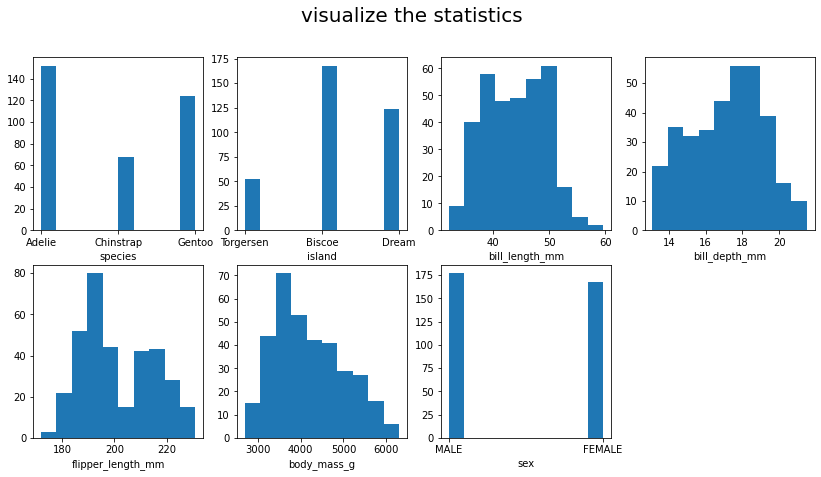

In [9]:
fig=plt.figure(figsize=(14,7))
fig.suptitle('visualize the statistics', fontsize=20)

plt.subplot(2,4,1)
plt.hist(df_['species'])
plt.xlabel('species')

plt.subplot(2,4,2)
plt.hist(df_['island'])
plt.xlabel('island')

plt.subplot(2,4,3)
plt.hist(df_['bill_length_mm'])
plt.xlabel('bill_length_mm')

plt.subplot(2,4,4)
plt.hist(df_['bill_depth_mm'])
plt.xlabel('bill_depth_mm')

plt.subplot(2,4,5)
plt.hist(df_['flipper_length_mm'])
plt.xlabel('flipper_length_mm')

plt.subplot(2,4,6)
plt.hist(df_['body_mass_g'])
plt.xlabel('body_mass_g')

plt.subplot(2,4,7)
plt.hist(df_['sex'])
plt.xlabel('sex')
plt.show()

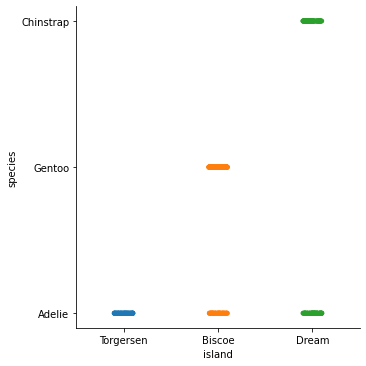

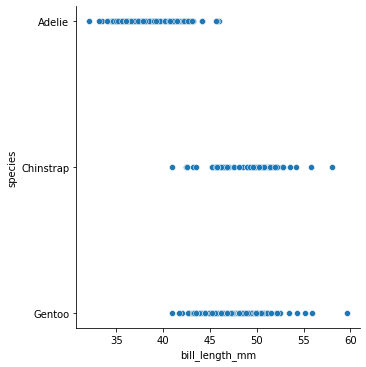

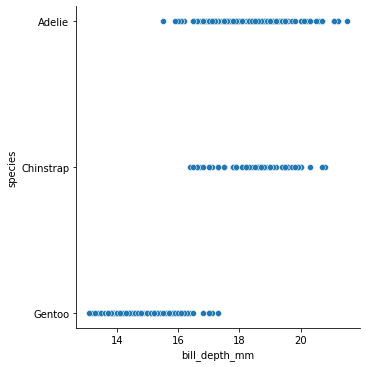

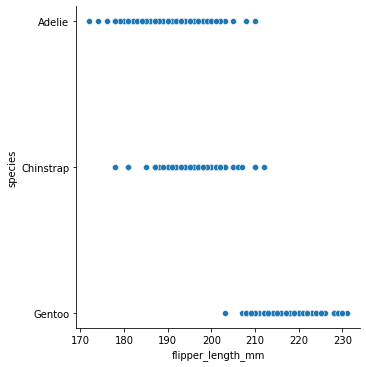

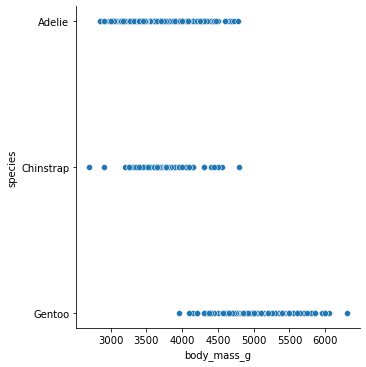

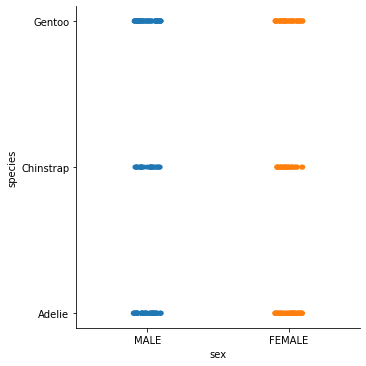

In [10]:
sns.catplot(data=df_, x="island", y="species")
sns.relplot(data=df, x="bill_length_mm", y="species")
sns.relplot(data=df, x="bill_depth_mm", y="species")
sns.relplot(data=df, x="flipper_length_mm", y="species")
sns.relplot(data=df, x="body_mass_g", y="species")
sns.catplot(data=df, x="sex", y="species")

In [11]:
df_.replace('FEMALE',1,inplace=True)
df_.replace('MALE',0,inplace=True)
df_.replace('Torgersen',1,inplace=True)
df_.replace('Biscoe',2,inplace=True)
df_.replace('Dream',3,inplace=True)
df_.replace('Adelie',1,inplace=True)
df_.replace('Chinstrap',2,inplace=True)
df_.replace('Gentoo',3,inplace=True)
df_.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,0
1,1,1,39.5,17.4,186.0,3800.0,1
2,1,1,40.3,18.0,195.0,3250.0,1
3,1,1,40.3,18.0,195.0,3250.0,1
4,1,1,36.7,19.3,193.0,3450.0,1


In [12]:
X=np.array(df_[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']])
y=np.array(df_['species'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
print(X_train)
print(y_train)
print(f"# of training data : {len(y_train)}")
print(f"# of test data     : {len(y_test)}")

[[1.000e+00 4.250e+01 2.070e+01 1.970e+02 4.500e+03 0.000e+00]
 [2.000e+00 3.880e+01 1.720e+01 1.800e+02 3.800e+03 0.000e+00]
 [2.000e+00 4.620e+01 1.450e+01 2.090e+02 4.800e+03 1.000e+00]
 ...
 [2.000e+00 3.860e+01 1.720e+01 1.990e+02 3.750e+03 1.000e+00]
 [2.000e+00 4.660e+01 1.420e+01 2.100e+02 4.850e+03 1.000e+00]
 [2.000e+00 3.770e+01 1.600e+01 1.830e+02 3.075e+03 1.000e+00]]
[1 1 3 1 2 3 3 1 3 2 1 1 3 1 1 1 1 3 1 3 3 2 3 1 3 1 1 2 1 1 3 3 1 1 1 3 3
 1 3 1 3 3 1 2 3 3 3 3 2 1 1 3 1 3 1 2 1 1 1 1 1 1 3 2 1 1 3 1 3 2 3 2 3 3
 3 2 3 1 1 3 3 2 1 3 3 1 3 3 3 3 2 2 3 2 3 1 1 2 3 1 3 3 1 1 3 1 1 3 1 2 2
 1 2 3 1 3 1 3 1 2 1 2 1 1 1 2 1 3 1 3 1 1 3 2 2 1 1 1 3 2 1 1 3 1 3 1 1 3
 3 3 1 3 2 3 2 2 1 2 1 1 2 1 1 3 1 1 3 1 3 2 3 1 3 3 2 3 1 1 1 1 1 1 1 2 1
 3 3 2 3 3 2 2 3 3 3 3 3 2 2 1 2 2 3 1 1 1 1 1 2 1 3 1 1 3 3 1 1 3 2 3 1 3
 3 3 1 1 2 2 3 2 2 1 1 3 3 1 3 2 3 2 3 3 3 1 1 1 1 1 3 2 1 3 1 2 1 1 3 1]
# of training data : 258
# of test data     : 86


Train Accuracy : 0.9767441860465116
Test  Accuracy : 0.9767441860465116


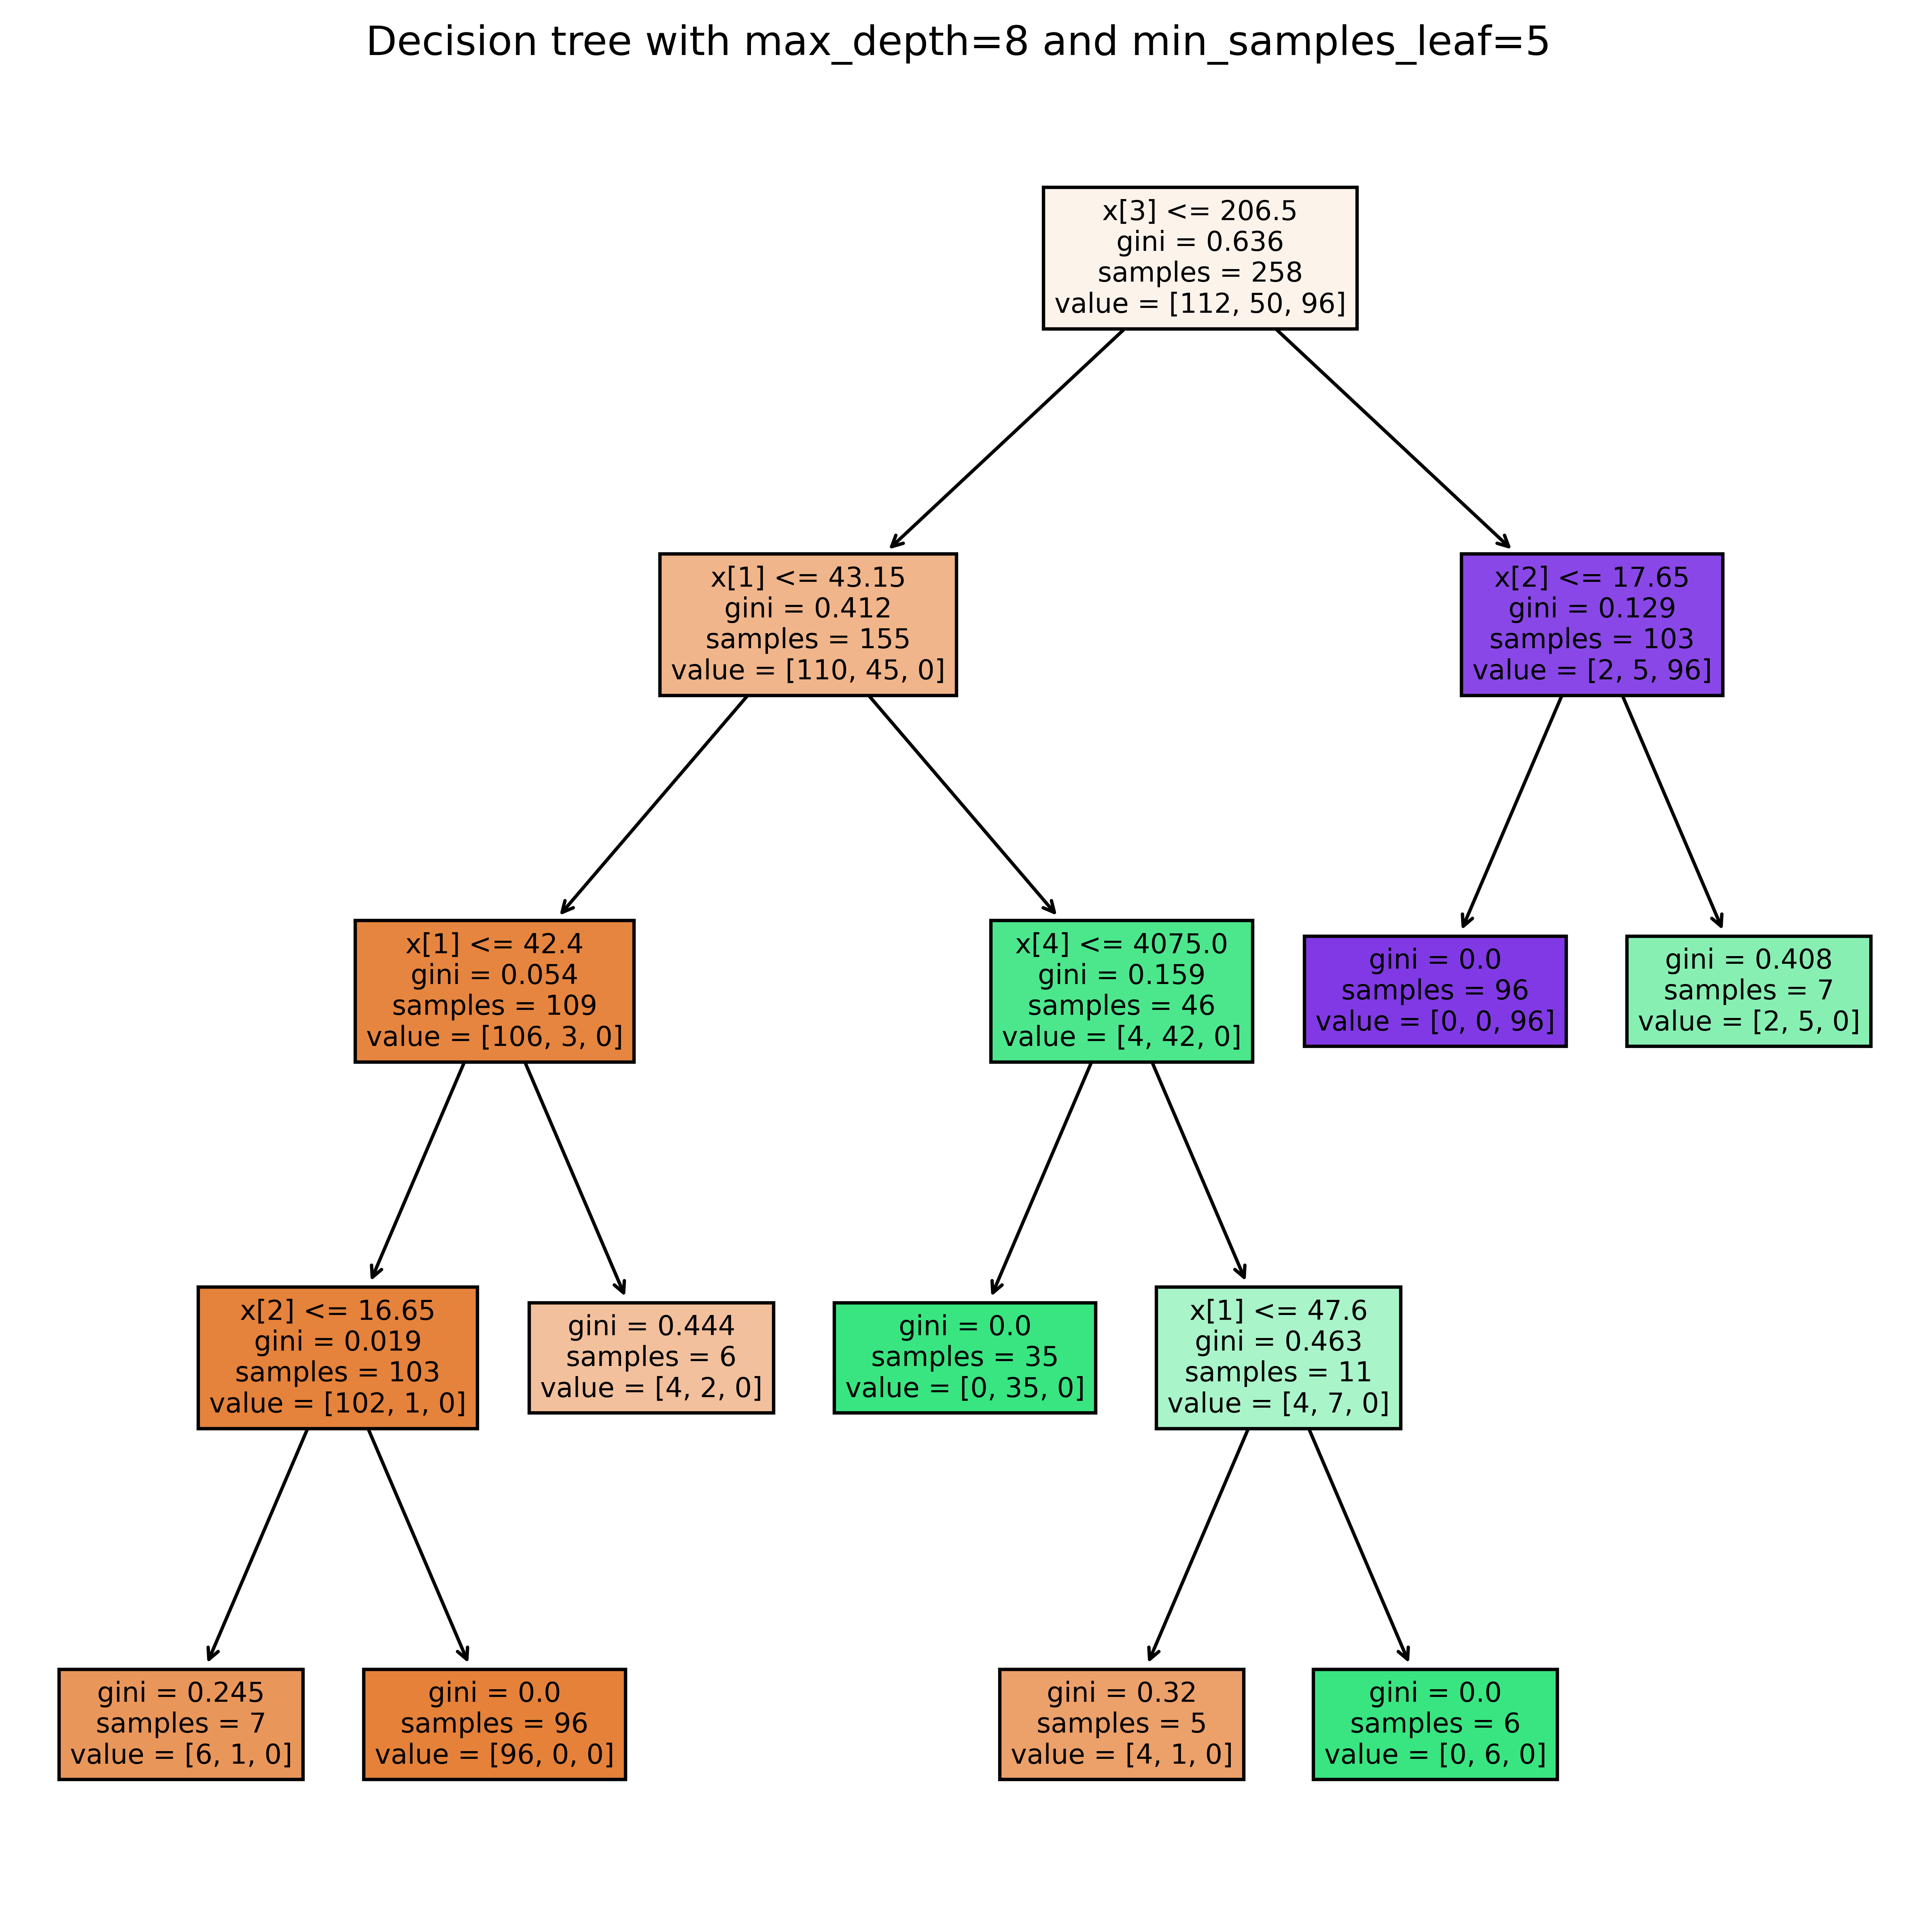

In [12]:
#Decision tree
# --- Adjustable Parameters --- #
max_depth = 8
min_samples_split = 2
min_samples_leaf=5
# ----------------------------- #
clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")
# --------------------------- #
fig=plt.figure(figsize=(10,10),dpi=600)
plot_tree(clf, filled=True)
plt.title("Decision tree with max_depth=8 and min_samples_leaf=5 ")
plt.show()

Train Accuracy : 0.937984496124031
Test  Accuracy : 0.9534883720930233


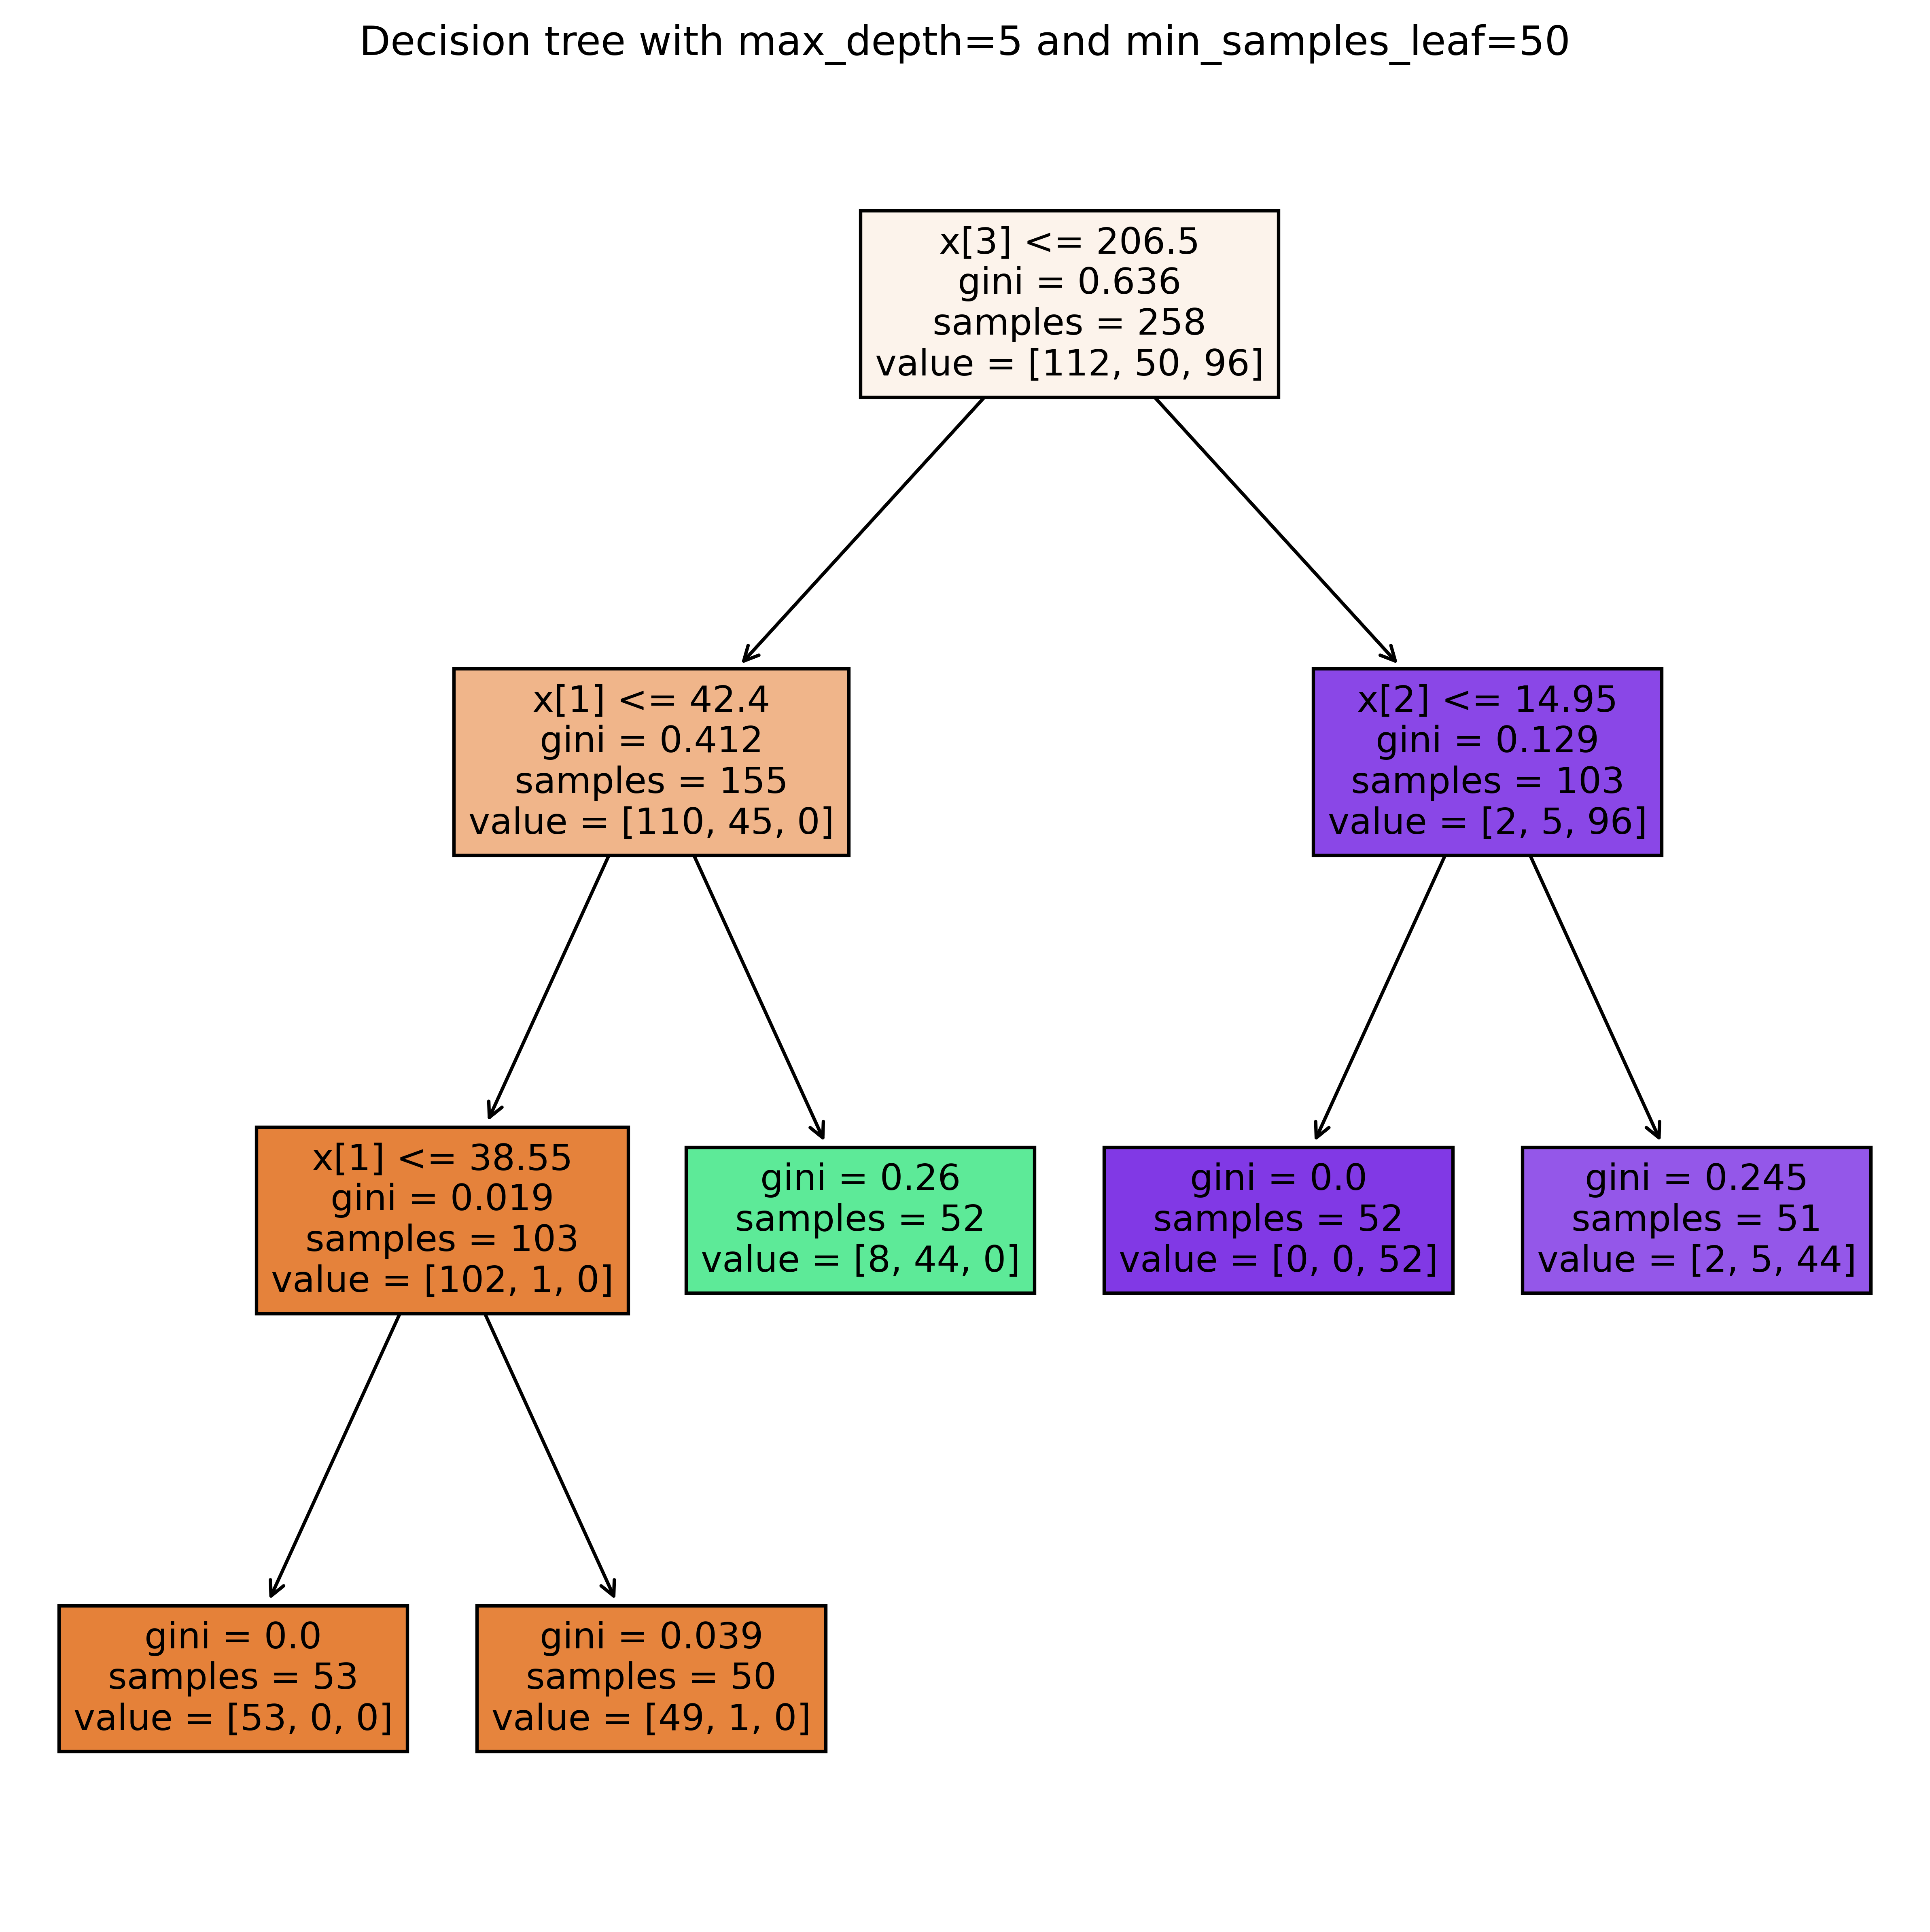

In [13]:
# --- Adjustable Parameters --- #
max_depth = 5
min_samples_split = 10
min_samples_leaf=50
# ----------------------------- #
clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")
# --------------------------- #
fig=plt.figure(figsize=(10,10),dpi=600)
plot_tree(clf, filled=True)
plt.title("Decision tree with max_depth=5 and min_samples_leaf=50")
plt.show()

Train Accuracy : 0.7984496124031008
Test  Accuracy : 0.7790697674418605


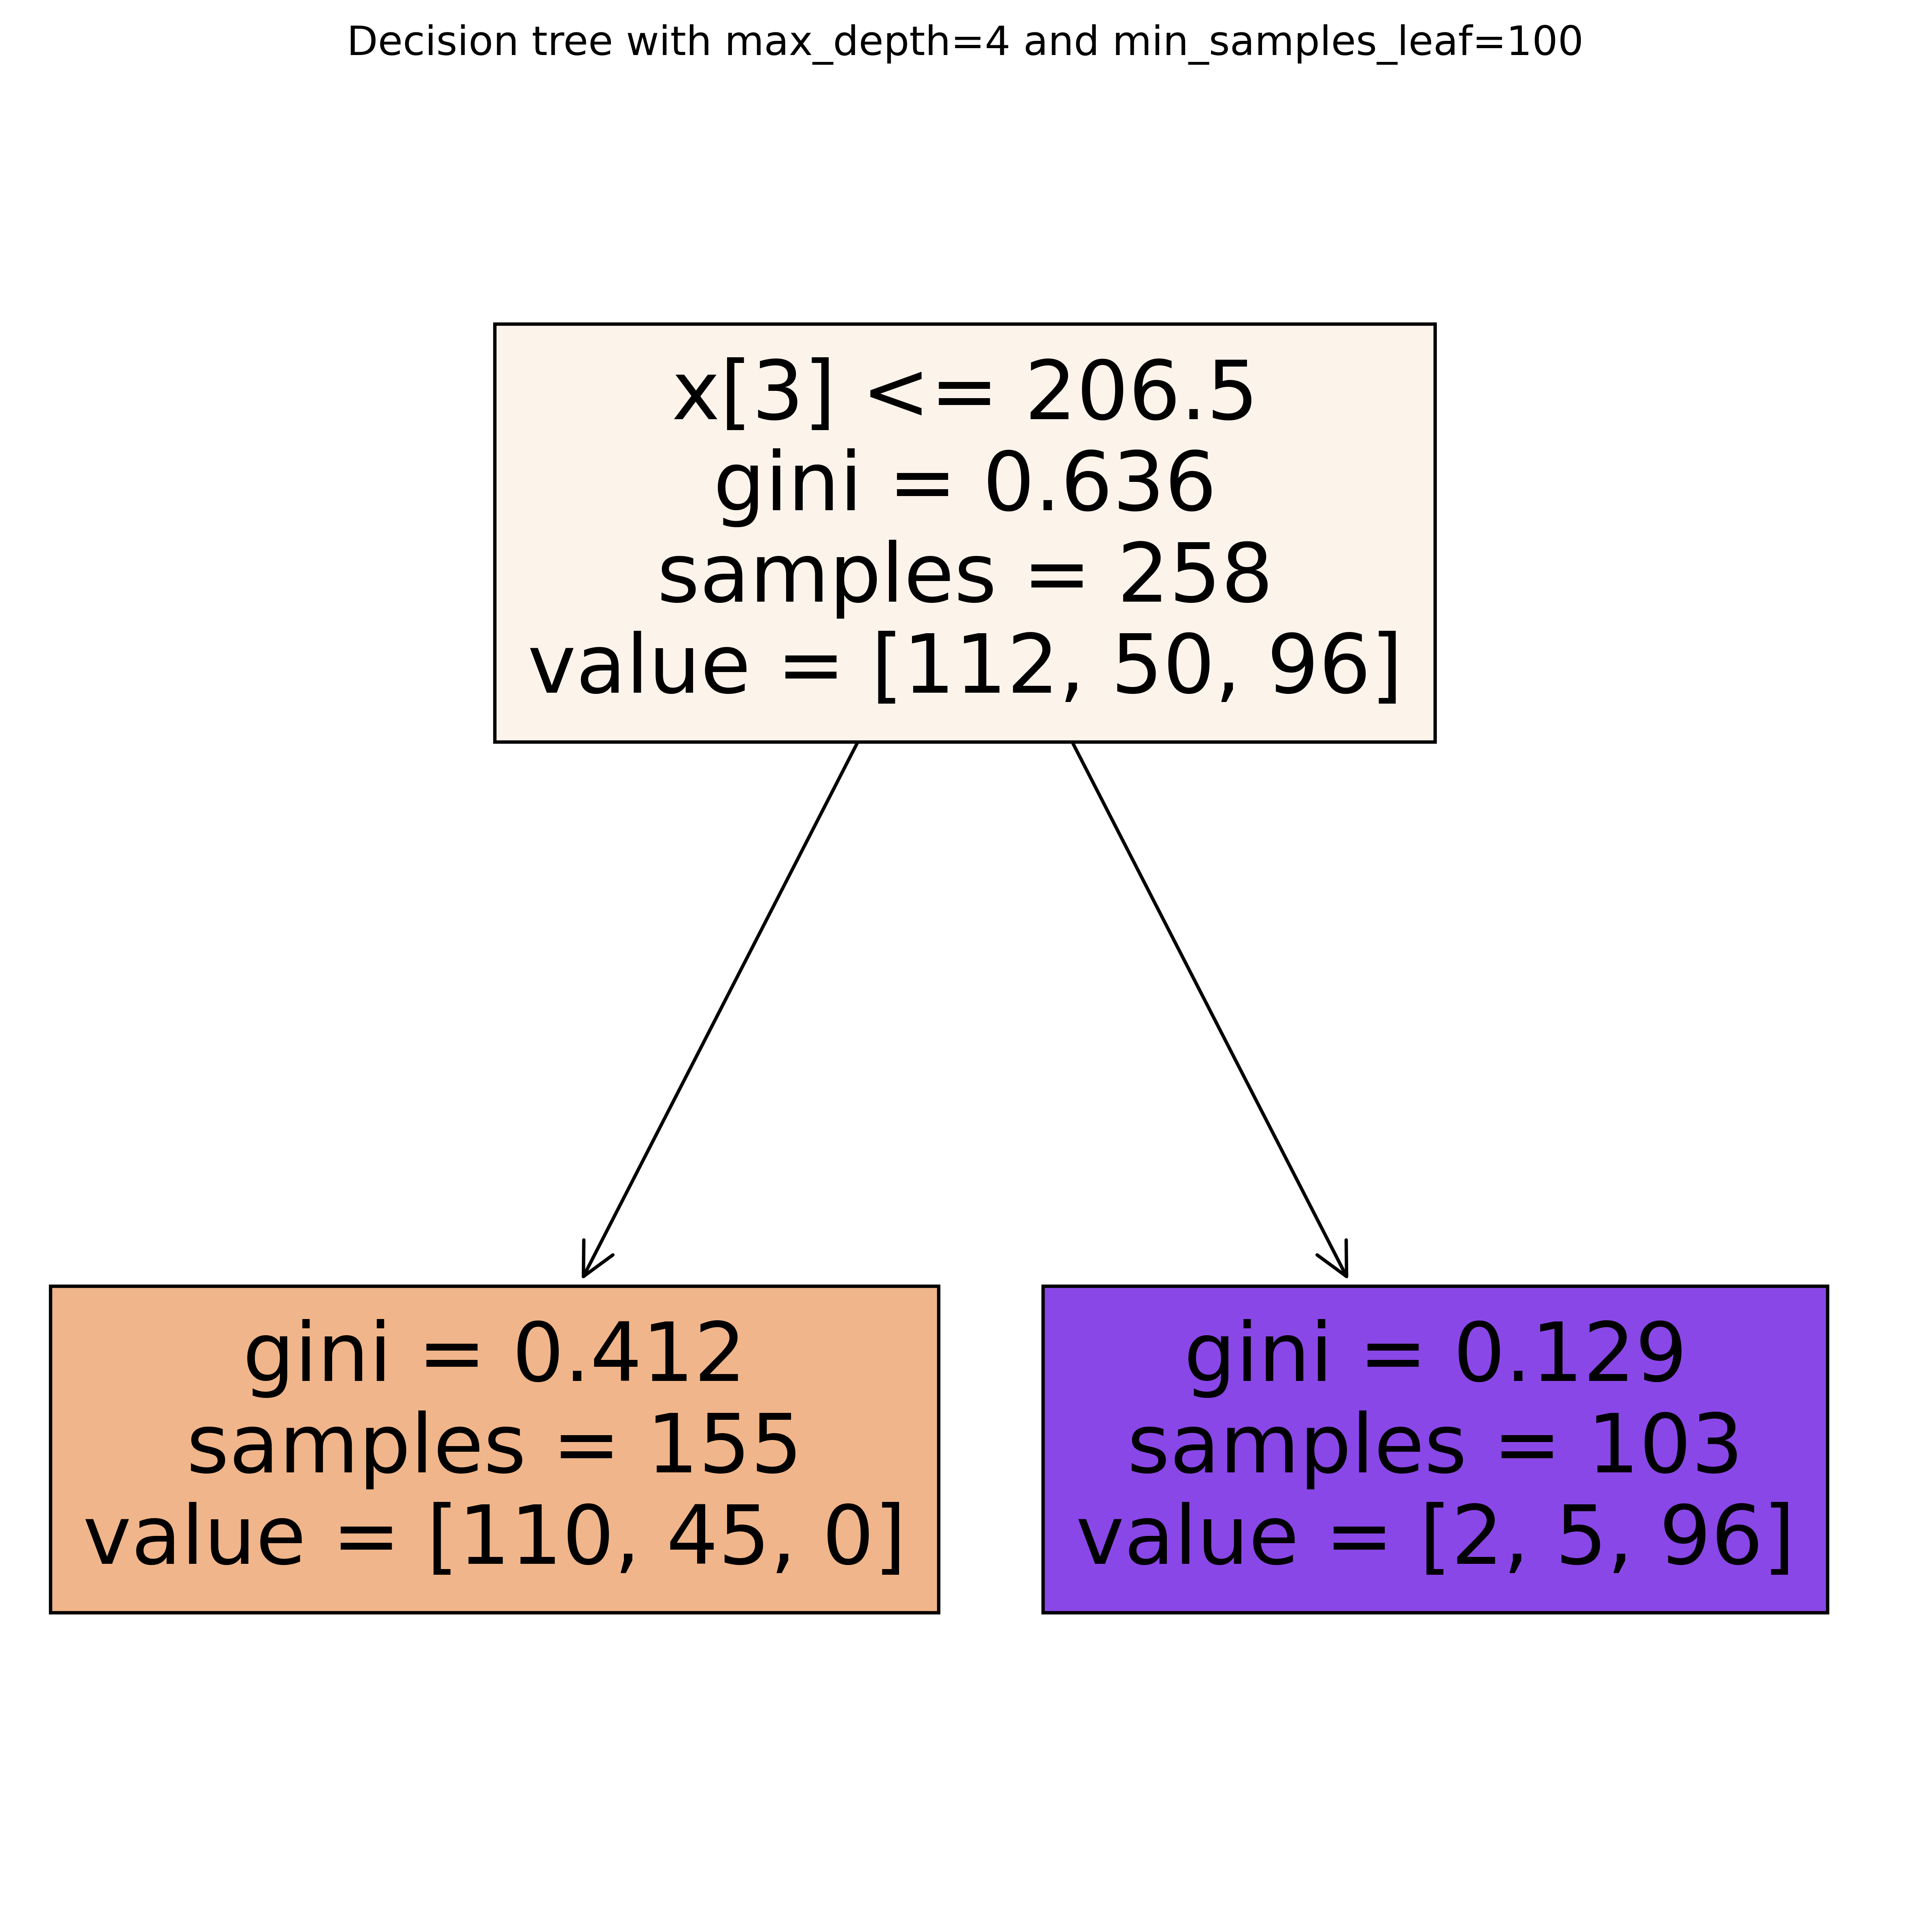

In [14]:
# --- Adjustable Parameters --- #
max_depth = 4
min_samples_split = 5
min_samples_leaf=100
# ----------------------------- #
clf = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf=min_samples_leaf)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")
# --------------------------- #
fig=plt.figure(figsize=(10,10),dpi=600)
plot_tree(clf, filled=True)
plt.title("Decision tree with max_depth=4 and min_samples_leaf=100")
plt.show()

In [17]:
#Bagging of trees
# --- Adjustable Parameters --- #
max_depth = 4
n_estimators = 5
# ----------------------------- #
dt = DecisionTreeClassifier(max_depth=max_depth)
clf = BaggingClassifier(estimator=dt,n_estimators=n_estimators)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 0.9922480620155039
Test  Accuracy : 0.9883720930232558


In [26]:
# --- Adjustable Parameters --- #
max_depth = 6
n_estimators = 10
# ----------------------------- #
dt = DecisionTreeClassifier(max_depth=max_depth)
clf = BaggingClassifier(estimator=dt,n_estimators=n_estimators)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 0.9961240310077519
Test  Accuracy : 0.9883720930232558


In [31]:
# --- Adjustable Parameters --- #
max_depth = 8
n_estimators = 15
# ----------------------------- #
dt = DecisionTreeClassifier(max_depth=max_depth)
clf = BaggingClassifier(estimator=dt,n_estimators=n_estimators)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 1.0
Test  Accuracy : 1.0


In [41]:
#Random forests
# --- Adjustable Parameters --- #
n_estimators = 5
m=20
# ----------------------------- #
clf = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=m)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 0.9922480620155039
Test  Accuracy : 0.9767441860465116


In [45]:
# --- Adjustable Parameters --- #
n_estimators = 10
m=30
# ----------------------------- #
clf = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=m)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 0.9883720930232558
Test  Accuracy : 0.9883720930232558


In [55]:
# --- Adjustable Parameters --- #
n_estimators = 15
m=45
# ----------------------------- #
clf = RandomForestClassifier(n_estimators=n_estimators,min_samples_split=m)
clf.fit(X_train, y_train)
# --------------------------- #
print(f"Train Accuracy : {clf.score(X_train, y_train)}")
print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

Train Accuracy : 0.9806201550387597
Test  Accuracy : 0.9883720930232558


In [13]:
# --- Adjustable Parameters --- #
estimators = [10,20,30,40,50,60,70,80,90,100]
bias=[]
variance=[]
# ----------------------------- #
for i in estimators:
    print("# of trees: ",i)
    clf = RandomForestClassifier(n_estimators=i,random_state=123)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            clf, X_train, y_train, X_test, y_test, 
            loss='mse',
            random_seed=123)
    clf.fit(X_train, y_train)
    print(f"Train Accuracy : {clf.score(X_train, y_train)}")
    print(f"Test  Accuracy : {clf.score(X_test, y_test)}")

    print('Average expected loss: %.3f' % avg_expected_loss)
    print('Average bias: %.3f' % avg_bias)
    print('Average variance: %.3f' % avg_var)
    bias.append(avg_bias)
    variance.append(avg_var)

# of trees:  10
Train Accuracy : 0.9961240310077519
Test  Accuracy : 0.9883720930232558
Average expected loss: 0.013
Average bias: 0.005
Average variance: 0.008
# of trees:  20
Train Accuracy : 1.0
Test  Accuracy : 1.0
Average expected loss: 0.011
Average bias: 0.005
Average variance: 0.006
# of trees:  30
Train Accuracy : 1.0
Test  Accuracy : 1.0
Average expected loss: 0.009
Average bias: 0.003
Average variance: 0.005
# of trees:  40
Train Accuracy : 1.0
Test  Accuracy : 1.0
Average expected loss: 0.008
Average bias: 0.003
Average variance: 0.005
# of trees:  50
Train Accuracy : 1.0
Test  Accuracy : 1.0
Average expected loss: 0.007
Average bias: 0.003
Average variance: 0.005
# of trees:  60
Train Accuracy : 1.0
Test  Accuracy : 1.0
Average expected loss: 0.006
Average bias: 0.003
Average variance: 0.004
# of trees:  70
Train Accuracy : 1.0
Test  Accuracy : 1.0
Average expected loss: 0.006
Average bias: 0.003
Average variance: 0.004
# of trees:  80
Train Accuracy : 1.0
Test  Accuracy :

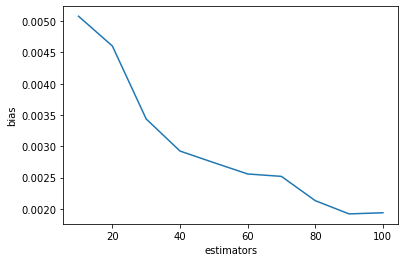

In [14]:
plt.plot(estimators,bias)
plt.xlabel("estimators")
plt.ylabel("bias")
plt.show()

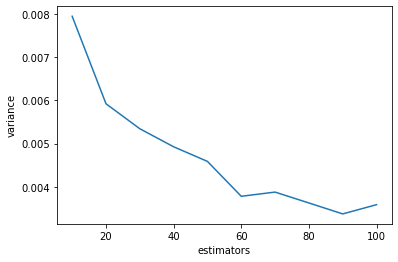

In [15]:
plt.plot(estimators,variance)
plt.xlabel("estimators")
plt.ylabel("variance")
plt.show()